# Using CellPipeline
## A cell type specific analysis and visualization tool for the gene of interest

In [31]:
import sys
sys.path.append('/lustre/groups/ml01/workspace/samantha.bening/Bachelor/')
from importlib import reload
import genereporter.cell_pipeline as cp
reload(cp)

cp = cp.CellPipeline("/lustre/groups/ml01/workspace/samantha.bening/Bachelor/", "data2/veo_ibd_all_samples.h5ad")

adata = cp.get_adata()
adata

AnnData object with n_obs × n_vars = 350912 × 28162
    obs: 'sampID', 'LMUSampID', 'PatientID', 'AnatomicLocation', 'PoolID', 'Protocol', 'CellsLoaded', 'FreezeProtocol', 'AnatomicLocation_Relation', 'AgeYM', 'Sex', 'Inflammation', 'Viability', 'SampleDate', 'sample_LMU_info_Timepoint', 'Ischemia_time', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'ribo_frac', 'hb_frac', 'celltype_l3', 'celltype_l1', 'celltype_l2'
    uns: 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'unintegrated_X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'connectivities', 'distances'

In [2]:
# print cell type names here; easier to select
print(f"Coarse cell types: ")
for cell_type in adata.obs['celltype_l2'].unique():
    print(f"\t{str(cell_type)}")

Coarse cell types: 
	Fibroblast
	Myeloid
	CD8 T
	Plasma
	CD4 T
	Epithelial
	Endothelial
	Glial
	NK_ILC
	B
	Pericyte
	Cycling T
	Cycling B
	Tuft
	Smooth Muscle Cell
	pDC
	Cycling Stroma
	Cycling Myeloid
	Mast
	nan


In [32]:
# set your gene of interest
GOI = "JCHAIN"

# set your cell type of interest
# This can be changed later as well
cell_type = 'Plasma'

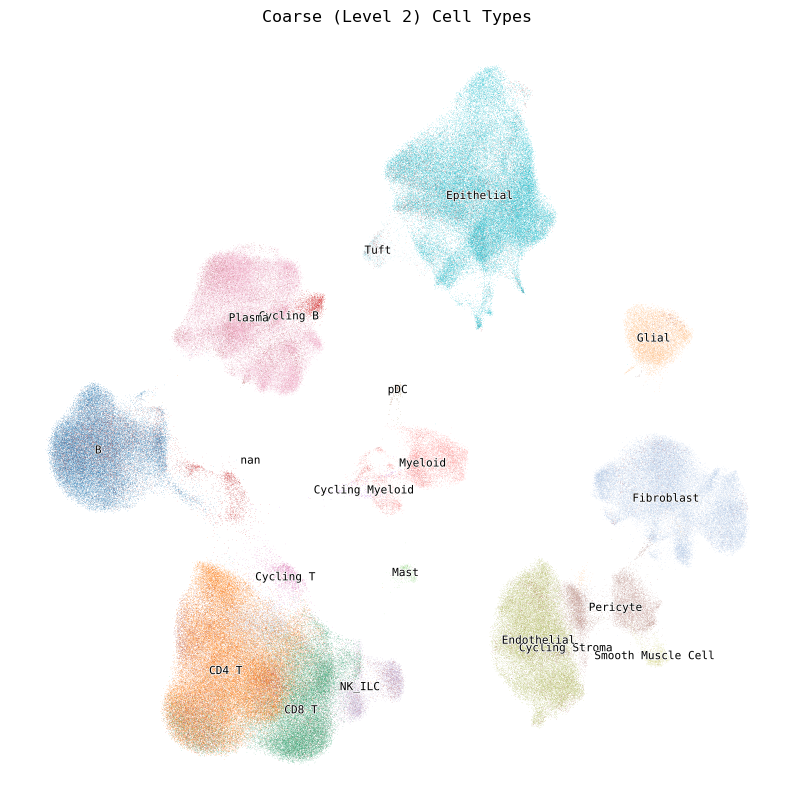

In [33]:
# UMAP of coarse cell types
cp.plot_umap(color="celltype_l2")

In [34]:
expr_sum = cp.explain_expr_celltypes(GOI='CASP8')
expr_sum

,Cell type,Expression class,Avg. expression over cell type
CASP8,pDC,low,0.348
CASP8,Cycling T,very low,0.276
CASP8,CD4 T,very low,0.265
CASP8,CD8 T,very low,0.243
CASP8,NK_ILC,very low,0.243
CASP8,Mast,very low,0.199
CASP8,nan,very low,0.143
CASP8,B,very low,0.138
CASP8,Cycling B,very low,0.134
CASP8,Tuft,very low,0.111


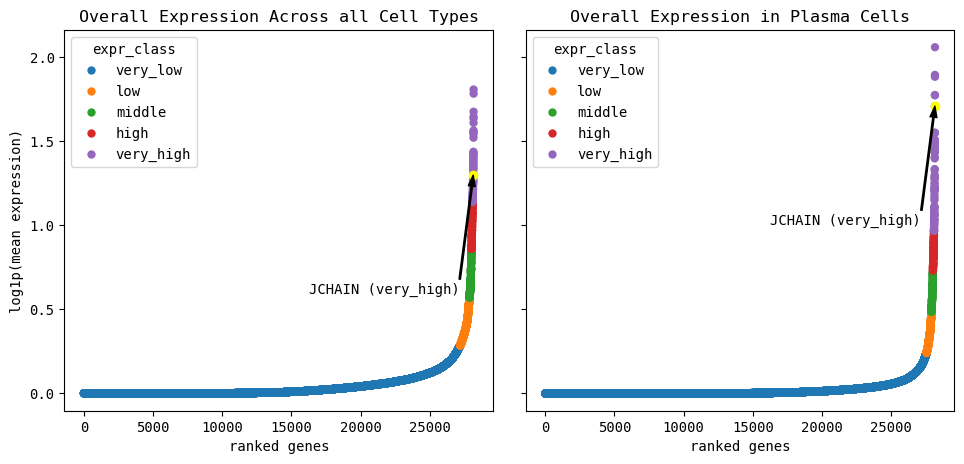

Summary for all cells: 
Quantile thresholds: 
very low: 96.5627, low: 98.9596, middle: 99.4496, high: 99.7479, very high: 99.7500

Number of genes per category: 
very_low: 27194
low: 675
middle: 138
high: 84
very_high: 71


Summary for Plasma cells: 
Quantile thresholds: 
very low: 97.8446, low: 99.091, middle: 99.4745, high: 99.7479, very high: 99.7500

Number of genes per category: 
very_low: 27555
low: 351
middle: 108
high: 77
very_high: 71



In [13]:
cp.plot_expressions(GOI, cell_type='Plasma', show_summary=True)
# Can change show_summary=True to show the summary of the expression classes (quantile thresholds and cell counts per category)

## GOI expression across cell types

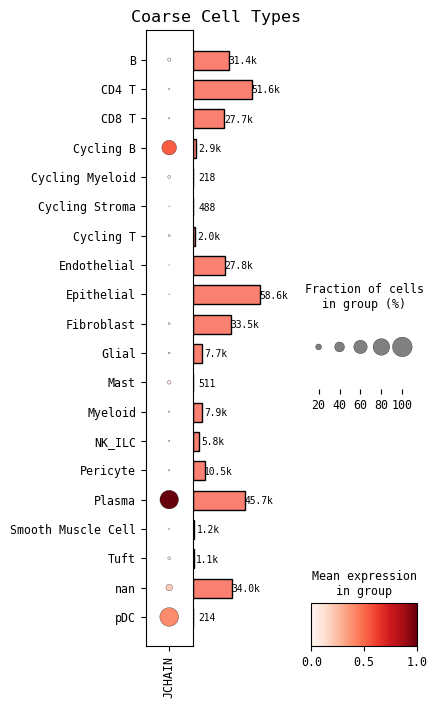

In [6]:
# find expression across cell types of GOI here
cp.dotplot(GOI)

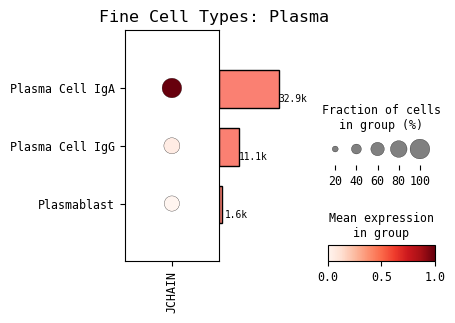

In [7]:
cp.dotplot(GOI, cell_type='Plasma')

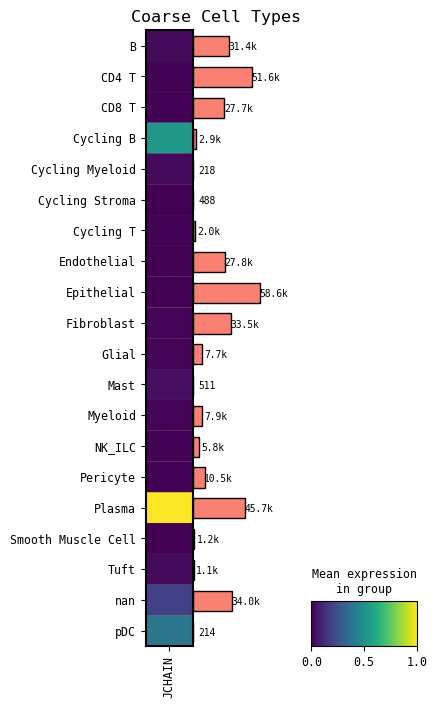

In [8]:
cp.matrixplot(GOI)

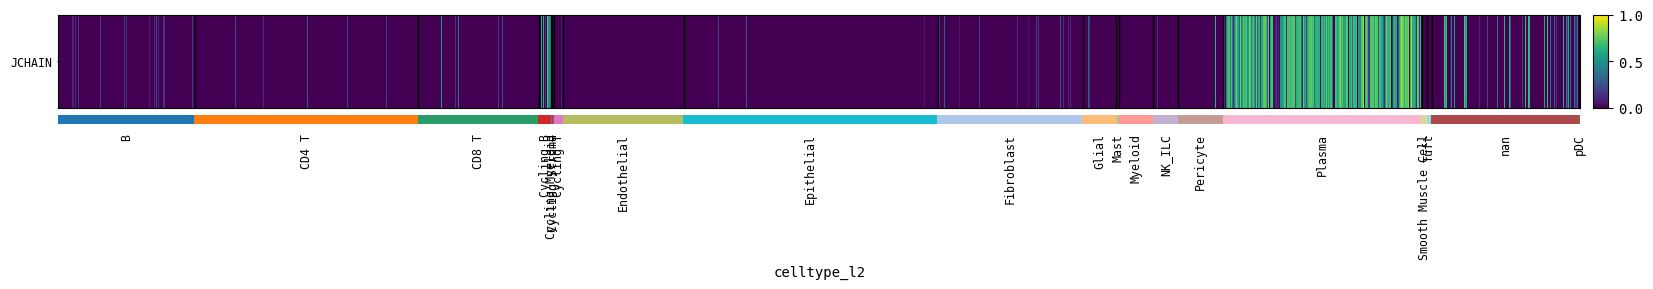

In [9]:
cp.heatmap(GOI)

## Expression vs. Detection visualization
<body>
<br>
This can contextualize the expression levels we observed previously. In single-cell RNA-seq, only a random sampling of the RNA present in a cell is selected to be sequenced. By pure chance, lowly expressed genes may not be present in all the sampled RNA due to their low prevalance. Here, we can inspect the maximum percentage of expression expected in all genes, specifically our gene of interest. 
</body>

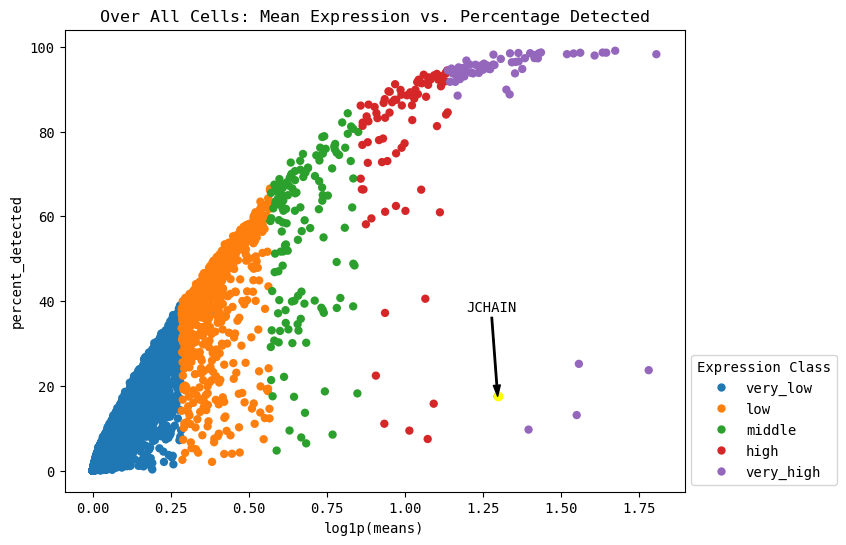

In [22]:
cp.expression_vs_detection(GOI)
# Can add "cell_type=cell_type" to plot only the cell type of interest
# todo this section before dotplots etc. 

### Automatically identify lower outliers (clue to look at celltype subset)

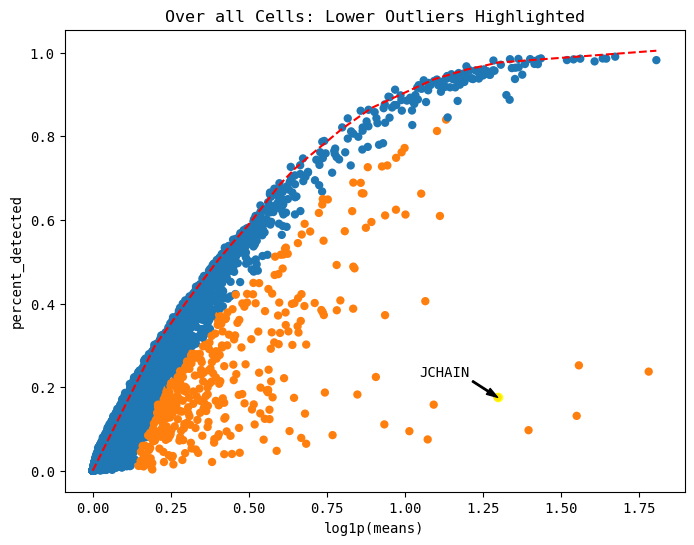

In [28]:
cp.plot_outliers(GOI, outlier_threshold=0.1)
# Can add "cell_type=cell_type" to plot only the cell type of interest

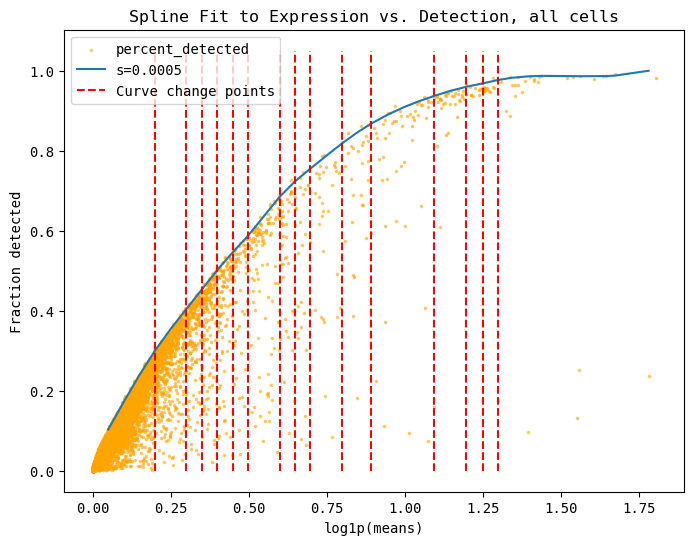

In [35]:
cp.fit_spline(plot=True)

In [15]:
cp.list_outliers()
# show top 5 most extreme outlier genes (by orthogonal distance to the max line)
# can show top x genes by adding "head=x" to the function

,log1p(means),percent_detected,distance,is_outlier
IGLC3,1.395567,0.096987,0.882218,True
IGLC2,1.549732,0.131269,0.855413,True
IGHG1,1.072599,0.074859,0.806405,True
JCHAIN,1.296640,0.175494,0.799030,True
IGHG3,1.013946,0.094594,0.768011,True
